<a href="https://colab.research.google.com/github/Hyenni/practice_tensorflow/blob/master/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOFTMAX (Image Classification)

* Multinomial Classification

### CF) MNIST IMAGE PRINT

Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz
X_train.shape:  (55000, 784)
Y_train.shape:  (55000, 10)
X_test.shape:  (10000, 784)
Y_test.shape:  (10000, 10)
digit_img.shape:  (784,)
digit_label.shape:  (10,)


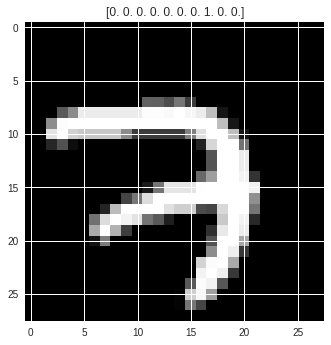

In [3]:
#MNIST data set download
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_DATA/", one_hot=True)

#train, test data load
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

#data shape
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

import matplotlib.pyplot as plt

#show image
digit_img = X_train[0]
digit_label = Y_train[0]
print("digit_img.shape: ", digit_img.shape)
print("digit_label.shape: ", digit_label.shape)
plt.imshow(digit_img.reshape(28, 28), cmap='gray')
plt.title(digit_label)
plt.show()


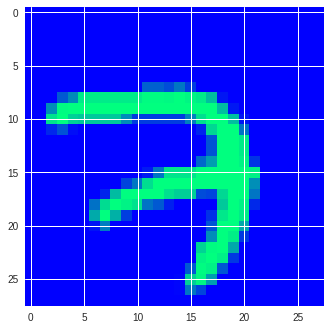

(784,)
[0.         0.         0.8862746  0.9960785  0.81568635 0.7803922
 0.7803922  0.7803922  0.7803922  0.54509807 0.2392157  0.2392157
 0.2392157  0.2392157  0.2392157  0.5019608  0.8705883  0.9960785
 0.9960785  0.7411765 ]


In [8]:
plt.imshow(digit_img.reshape(28, 28), cmap="winter")
plt.show()

print(digit_img.shape)
print(digit_img.reshape(28,28)[10,0:20])

# MNIST Image Classification using Softmax

In [9]:
#MNIST data set load
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets("./MNIST_DATA", one_hot=True)

Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [0]:
# parameters
NUM_STEPS = 1000
MINIBATCH_SIZE = 100

In [11]:
# input placeholder
x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32, [None, 10])

# variables
W = tf.Variable(tf.zeros([784, 10]))

# logit
y_pred = tf.matmul(x, W)

# loss
cross_entropy = tf.reduce_mean(
                    tf.nn.softmax_cross_entropy_with_logits(
                        logits=y_pred, labels=y_true))
# optimizer
gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# accuracy
correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [12]:
%%time
# training
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for _ in range(NUM_STEPS):
    batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
    sess.run(gd_step, feed_dict={x: batch_xs, 
                                 y_true: batch_ys})

CPU times: user 1.57 s, sys: 152 ms, total: 1.72 s
Wall time: 1.52 s


In [13]:
%%time
# testing
ans = sess.run(accuracy, feed_dict={x: data.test.images,
                                    y_true: data.test.labels})
print("Accuracy: {:.4}%".format(ans*100))

Accuracy: 91.55%
CPU times: user 24.2 ms, sys: 3.85 ms, total: 28 ms
Wall time: 36.9 ms


Predicted Label:  8
Real Label:  3


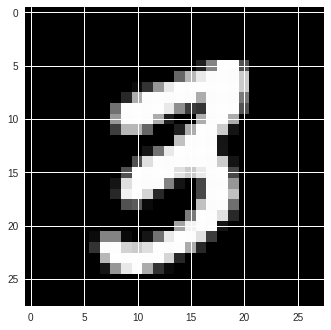

In [88]:
import numpy as np

# predict
test_num = np.random.randint(0, data.test.images.shape[0])

img = mnist.test.images[test_num]

pred = sess.run(tf.argmax(y_pred, 1), feed_dict={x: [img]})
print("Predicted Label: ", pred[0])
print("Real Label: ", np.argmax(data.test.labels[test_num]))

img = np.resize(img, (28,28))
plt.imshow(img, cmap='gray')
plt.show()

Predicted Label:  1
Real Label:  1


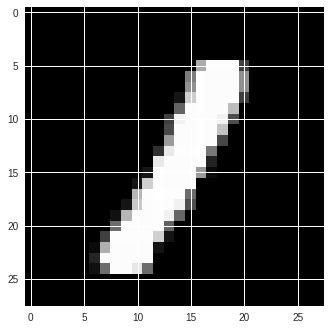

In [92]:
test_num2 = np.random.randint(0, data.test.images.shape[0])

img2 = mnist.test.images[test_num2]

pred2 = sess.run(tf.argmax(y_pred, 1), feed_dict={x: [img2]})
print("Predicted Label: ", pred2[0])
print("Real Label: ", np.argmax(data.test.labels[test_num2]))

img2 = np.resize(img2, (28,28))
plt.imshow(img2, cmap='gray')
plt.show()